In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

X.shape

torch.Size([100, 1])

epoch: 10, loss = 4101.1577, weight = 12.688956260681152, bias = 0.994270920753479
epoch: 20, loss = 2889.7500, weight = 23.521203994750977, bias = 1.1012420654296875
epoch: 30, loss = 2063.7693, weight = 32.46624755859375, bias = 1.124626874923706
epoch: 40, loss = 1500.4678, weight = 39.8532600402832, bias = 1.0908679962158203
epoch: 50, loss = 1116.2297, weight = 45.95392990112305, bias = 1.0196253061294556
epoch: 60, loss = 854.0818, weight = 50.99251174926758, bias = 0.9253576397895813
epoch: 70, loss = 675.1948, weight = 55.15412139892578, bias = 0.8185533285140991
epoch: 80, loss = 553.1013, weight = 58.59156036376953, bias = 0.706688642501831
epoch: 90, loss = 469.7545, weight = 61.430992126464844, bias = 0.5949690341949463
epoch: 100, loss = 412.8476, weight = 63.77655792236328, bias = 0.4869023263454437


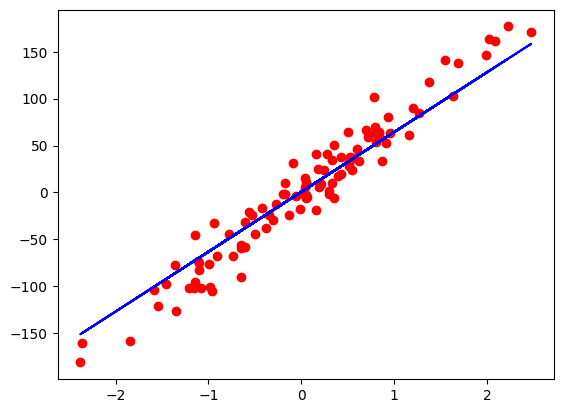

In [12]:

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad() 

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, weight = {model.weight.item():}, bias = {model.bias.item():}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [11]:
(model.bias)

Parameter containing:
tensor([0.9566], requires_grad=True)